<a href="https://colab.research.google.com/github/abignu/TFG/blob/master/SVM_simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#importamos Cancer dataset de las librerías de Sklearn
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [0]:
#armamos el dataframe
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

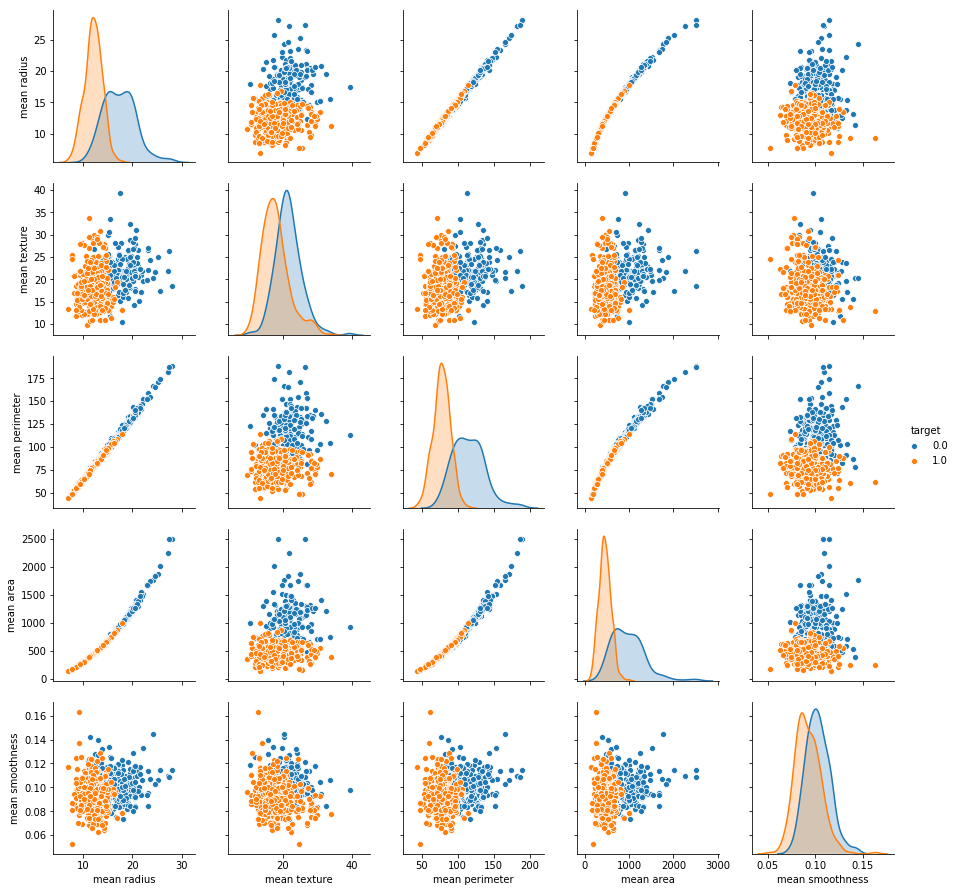

In [0]:
#el dataset tiene 569 filas y 31 cols
#visualizamos dataset
#naranja = benigno (no cancer) = 1
#azul = maligno (cancer) = 0
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

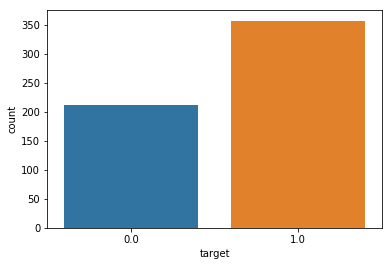

In [0]:
#tenemos 357 casos benignos y 212 malignos
sns.countplot(df_cancer['target'], label = "Count")


In [0]:
X = df_cancer.drop(['target'], axis = 1) #input
y = df_cancer['target'] #output

In [0]:
#entrenamos modelo
from sklearn.model_selection import train_test_split

#20% del dataset se usa para testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

#normalizo data
X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_range = (X_train_max- X_train_min)

X_train_scaled = (X_train - X_train_min)/(X_train_range) #input normalizado (entre 0 y 1)

X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range
#cargamos modelo
from sklearn.svm import SVC
svc_model = SVC()

#lo entrenamos
svc_model.fit(X_train_scaled, y_train)

#hacemos predicción
y_predict = svc_model.predict(X_test_scaled)

c:\users\agustin\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


            predicted_cancer  predicted_healthy
is_cancer                 66                  0
is_healthy                 1                 47


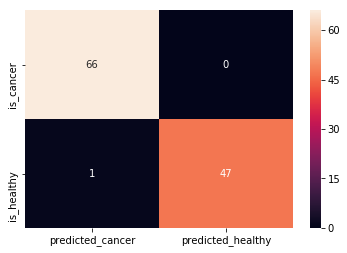

In [0]:
# Import metric libraries
from sklearn.metrics import classification_report, confusion_matrix

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(confusion,annot=True,fmt="d")

In [0]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

   micro avg       0.99      0.99      0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

